In [1]:

import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
import os
from brukeropusreader import read_file
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import scipy.signal as signal

In [2]:
def open_file_and_plot():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

In [3]:
 file_path = filedialog.askopenfilename()

2024-03-12 08:12:54.099 python[39024:1552556] +[CATransaction synchronize] called within transaction


In [4]:
if file_path:
        # Reading the OPUS file
        opus_data = read_file(file_path)

In [5]:
 file_name = os.path.basename(file_path)

In [6]:
absorbance = opus_data['AB']

In [7]:

start_wn = opus_data['AB Data Parameter']['FXV']
end_wn = opus_data['AB Data Parameter']['LXV']
num_points = opus_data['AB Data Parameter']['NPT']

In [8]:
num_points = len(absorbance)

In [9]:
wavenumbers = np.linspace(start_wn, end_wn, num_points)

In [10]:
assert len(wavenumbers) == len(absorbance), "Wavenumbers and absorbance arrays must be the same length."

In [11]:
baseline_corrected = savgol_filter(absorbance, 10000, 0)  # You can adjust the window size and polynomial order
corrected_absorbance = absorbance - baseline_corrected

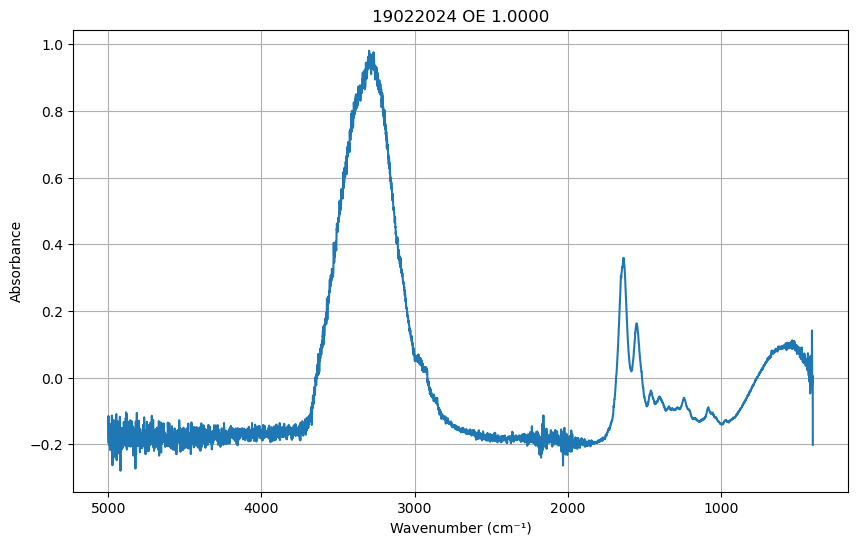

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, corrected_absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)  # Using the file name as the title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()


In [13]:
# Finden des minimalen und maximalen Absorptionswerts
min_absorbance = min(corrected_absorbance)
max_absorbance = max(corrected_absorbance) # hier wenn man die baseline correction will mit corrected_absorbance

# Normalisieren der absorbance Daten auf den Bereich [0, 1]
normalized_absorbance = (corrected_absorbance - min_absorbance) / (max_absorbance - min_absorbance)


In [14]:
a = 0  # Neuer minimaler Wert
b = 1  # Neuer maximaler Wert

# Normalisieren der absorbance Daten auf den Bereich [a, b]
normalized_absorbance = a + (corrected_absorbance - min_absorbance) * (b - a) / (max_absorbance - min_absorbance)


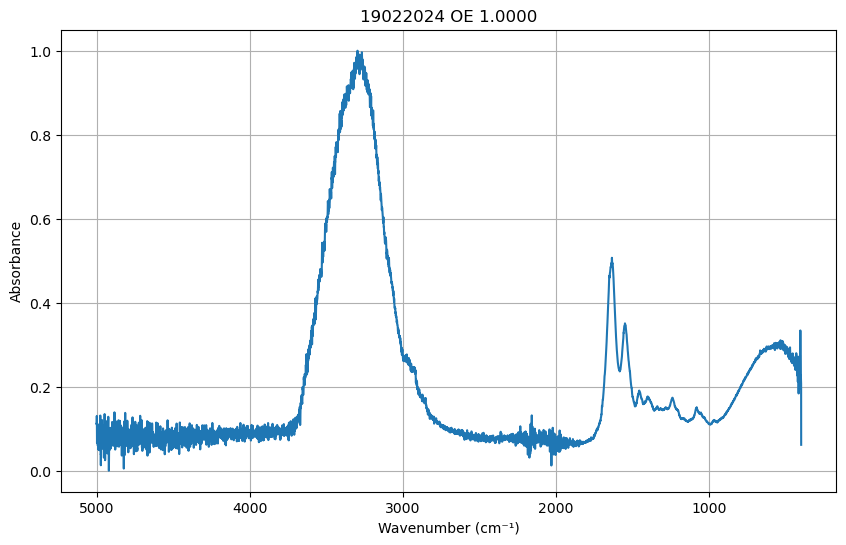

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, normalized_absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)  # Using the file name as the title file_name
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()


In [16]:
height = 0.15  # Minimum peak height threshold (adjust for your data)
prominence = 0.05  # Minimum prominence (flatness of peak compared to baseline)
distance = 1  # Minimum distance between peaks (in wavenumber units)
peaks, _ = signal.find_peaks(normalized_absorbance, height=height, prominence=prominence, distance=distance)
peak_wavenumbers = wavenumbers[peaks]
peak_absorbances = normalized_absorbance[peaks]


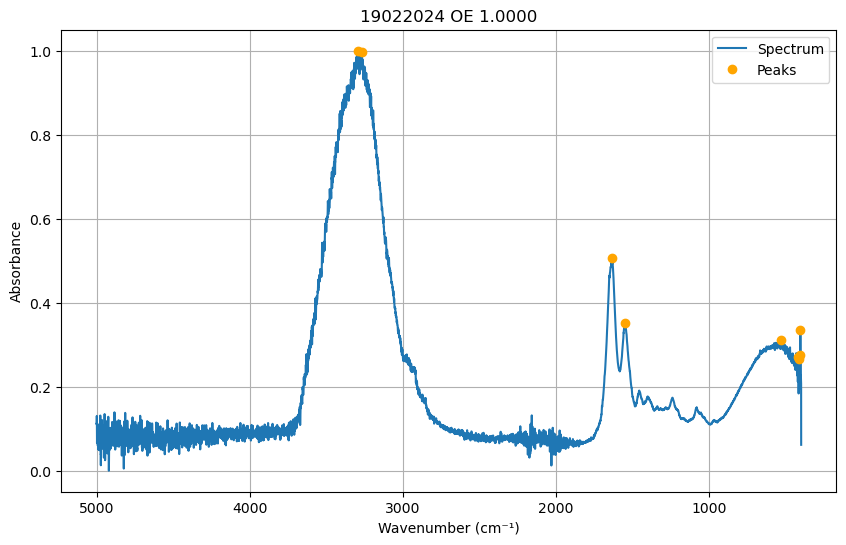

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, normalized_absorbance, label='Spectrum')
plt.plot(peak_wavenumbers, peak_absorbances, 'o', color='orange', label='Peaks')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)
plt.grid(True)
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()  # Add legend for spectrum and peaks
plt.show()

In [18]:
peak_wavenumbers = wavenumbers[peaks]
peak_absorbances = normalized_absorbance[peaks]
